![title](Cinema-iStock.jpg)

# Análise de dados sobre filmes produzidos no período de 1874 a 2020

In [153]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import datetime as dt
import seaborn as sns
%matplotlib inline

In [154]:
# Lendo as planilhas
inicio = dt.datetime.now()
movie = pd.read_csv('movies_metadata.csv',sep=',',low_memory=False)
mdb = pd.read_csv('link.csv',sep=',',low_memory=False)
credits = pd.read_csv('credits.csv',sep=',')
rat = pd.read_csv('ratings.csv',sep=',')
final = dt.datetime.now()
print(f"O tempo gasto para ler as planilhas foi {final-inicio}")

O tempo gasto para ler as planilhas foi 0:03:05.416826


# Setando as configurações de visualização do dataset

In [155]:
# setando a expansão das colunas
pd.set_option('display.max_columns',None,'max_rows',None,'max_info_columns',100)
# Formatando a visualização de casas decimais
pd.options.display.float_format = '{:.2f}'.format
# Formatando o tamanho das figuras plotadas 
sns.set(rc={'figure.figsize':(15,10)})

# Visualizando as planillhas

In [156]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


# Tratando os dados

In [159]:
# Mudando os tipos de valores no dataset
movie['revenue'] = pd.to_numeric(movie['revenue'],errors='coerce')
movie['budget'] = pd.to_numeric(movie['budget'],errors='coerce')
movie['vote_count'] = pd.to_numeric(movie['vote_count'],errors='coerce')
movie['vote_average'] = pd.to_numeric(movie['vote_average'],errors='coerce')
movie['popularity'] = pd.to_numeric(movie['popularity'],errors='coerce')
#movie['id'] = movie['id'].astype('int64')

In [160]:
# Preenchendo os valores nulos da colunas vote_average, vote_count e popularity com suas respectivas médias
movie['vote_average'].replace(np.nan,movie['vote_average'].median(),inplace=True)
movie['vote_count'].replace(np.nan,movie['vote_count'].median(),inplace=True)
movie['runtime'].replace(np.nan,movie['runtime'].mean(),inplace=True)

In [161]:
# Retirando os valores vazios
movie.dropna(subset=['popularity','revenue'],inplace=True)

In [162]:
# Retirando as colunas
movie.drop(columns=['imdb_id','video','poster_path','homepage','original_title','overview','tagline'],inplace=True)

In [163]:
# Gerando a função que irá extrair informações das colunas com formato de string em listas
def get_list(x, l=5):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than l elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > l:
            names = names[:l]
        return names

    #Return empty list in case of missing/malformed data
    return []


# Aplicando as funções:

# Gênero
movie['genres'] = movie['genres'].apply(lambda x: literal_eval(str(x)))
movie['genres'] = movie['genres'].apply(lambda x: get_list(x))

# Companhia
movie['production_companies'] = movie['production_companies'].apply(lambda x : literal_eval(x))
movie['production_companies'] = movie['production_companies'].apply(lambda x : get_list(x))

# País
movie['production_countries'] = movie['production_countries'].apply(lambda x : literal_eval(x))
movie['production_countries'] = movie['production_countries'].apply(lambda x : get_list(x))

# Língua
movie['spoken_languages'] = movie['spoken_languages'].apply(lambda x: literal_eval(x))
movie['spoken_languages'] = movie['spoken_languages'].apply(lambda x: get_list(x))

In [164]:
# Acrescentando o indicador que diz a quantidade de gêneros por filme
def qtd_gen(x):
    return int(len(x))

movie['len_genres'] = movie['genres'].apply(lambda x: qtd_gen(x))

In [165]:
# Adicionando a coluna do ano e mês que o filme foi lançado
def ano(x):
    return str(x).split('-')[0]


def mes(x):
    if len(str(x)) > 3:
        return str(x).split('-')[1]
    

# Aplicando as funções
movie['year'] =  pd.to_datetime(movie['release_date'],errors='coerce').apply(lambda x : ano(x) if x != np.nan else np.nan)
movie['month'] = pd.to_datetime(movie['release_date'],errors='coerce').apply(lambda x: mes(x))

# mudando o tipo de valor da coluna:
movie['year'] = movie['year'].astype('int64',errors='ignore')
movie['month'] = movie['month'].astype('int64',errors='ignore')

In [166]:
#Reorganizando a disposição das colunas
movie = movie[['title','status','adult','genres','len_genres','belongs_to_collection','production_countries','production_companies',
              'original_language','spoken_languages','release_date','year','month','budget','revenue', 'popularity','runtime',
              'vote_average', 'vote_count','id']]

In [167]:
movie.head()

,title,status,adult,genres,len_genres,belongs_to_collection,production_countries,production_companies,original_language,spoken_languages,release_date,year,month,budget,revenue,popularity,runtime,vote_average,vote_count,id
0,Toy Story,Released,False,"[Animation, Comedy, Family]",3,"{'id': 10194, 'name': 'Toy Story Collection', ...",[United States of America],[Pixar Animation Studios],en,[English],1995-10-30,1995,10,30000000.00,373554033.00,21.95,81.00,7.70,5415.00,862
1,Jumanji,Released,False,"[Adventure, Fantasy, Family]",3,NaN,[United States of America],"[TriStar Pictures, Teitler Film, Interscope Co...",en,"[English, Français]",1995-12-15,1995,12,65000000.00,262797249.00,17.02,104.00,6.90,2413.00,8844
2,Grumpier Old Men,Released,False,"[Romance, Comedy]",2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",[United States of America],"[Warner Bros., Lancaster Gate]",en,[English],1995-12-22,1995,12,0.00,0.00,11.71,101.00,6.50,92.00,15602
3,Waiting to Exhale,Released,False,"[Comedy, Drama, Romance]",3,NaN,[United States of America],[Twentieth Century Fox Film Corporation],en,[English],1995-12-22,1995,12,16000000.00,81452156.00,3.86,127.00,6.10,34.00,31357
4,Father of the Bride Part II,Released,False,[Comedy],1,"{'id': 96871, 'name': 'Father of the Bride Col...",[United States of America],"[Sandollar Productions, Touchstone Pictures]",en,[English],1995-02-10,1995,02,0.00,76578911.00,8.39,106.00,5.70,173.00,11862


# Tasks e respostas

## Ano

1 - Como é a distribuição dos filmes ao longo dos anos?

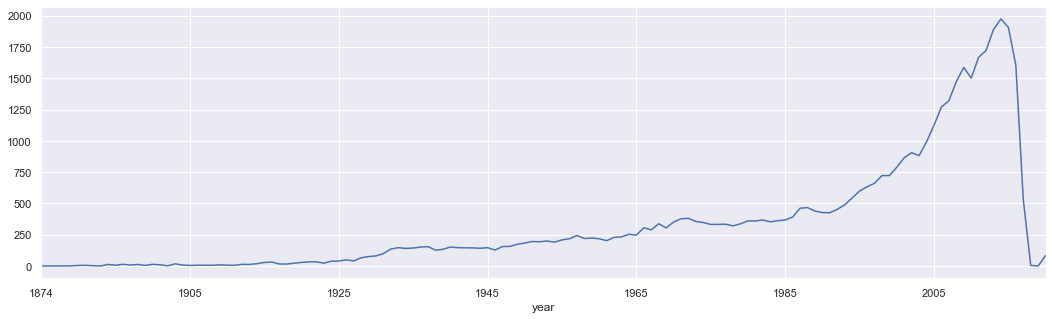

In [168]:
year_count = movie.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()
plt.show()

2 - Quais são os TOP 5 dos anos que obtiveram as maiores receitas ?

In [169]:
top5_receita = pd.DataFrame(movie.groupby('year')['revenue'].sum().sort_values(ascending=False).head(5)).reset_index()
top5_receita = top5_receita.sort_values(by=['year'],ascending=True)

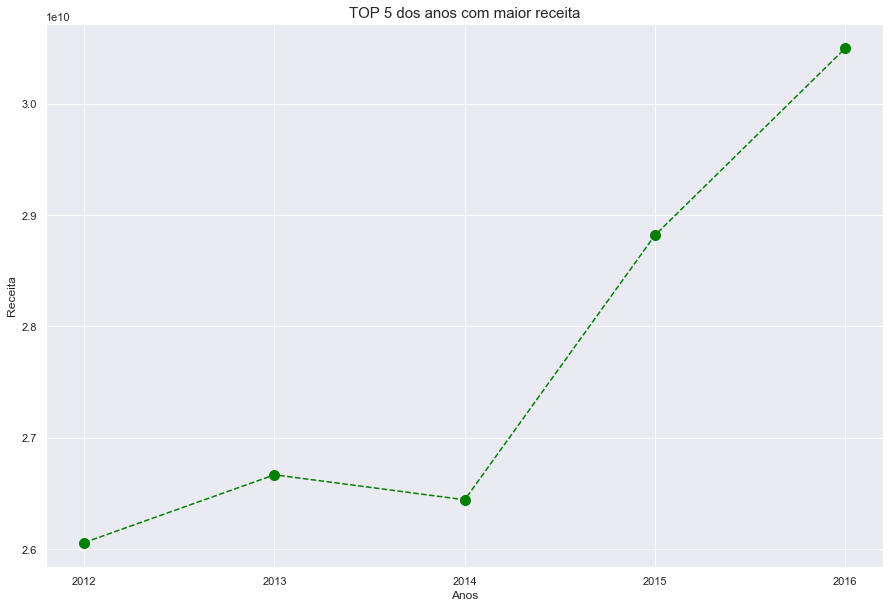

In [170]:
plt.plot(top5_receita['year'],top5_receita['revenue'],linestyle='--',color='green',marker='o',markersize=10)
plt.xlabel('Anos')
plt.ylabel('Receita')
plt.title('TOP 5 dos anos com maior receita',size=15,loc='center')
plt.show()

## Popularidade

1 - Quais são os TOP 10 filmes que apresentam maiores popularidades?

In [171]:
# Extraindo o top 10 
top_10_popularidade = pd.DataFrame(movie.groupby('title')['popularity'].sum().sort_values(ascending=False).head(10)).reset_index()

In [172]:
# sorteando o dataframe para obter a visualização no gráfico do maior para o menor
top_10_popularidade = top_10_popularidade.sort_values(by=['popularity'],ascending=True)

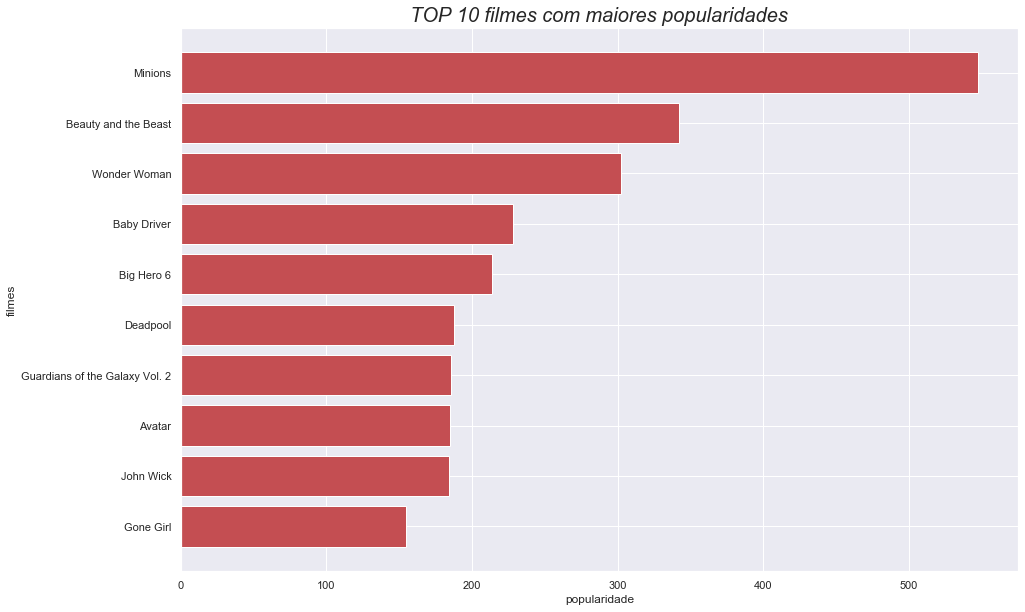

In [173]:
# Plotando o gráfico
plt.barh(top_10_popularidade['title'],top_10_popularidade['popularity'],color='r')
plt.ylabel('filmes')
plt.xlabel('popularidade')
plt.title('TOP 10 filmes com maiores popularidades',size=20,loc='center',fontstyle='oblique')
plt.grid(True)
plt.show()

2 - Qual a correlação da popularidade dos filmes de 2016 e suas receitas?

In [174]:
# Filtrando os filmes que foram feitos em 2016
movie_2016 = movie.loc[movie['year'] == '2016']

In [175]:
movie_2016.describe()

,len_genres,budget,revenue,popularity,runtime,vote_average,vote_count
count,1604.00,1604.00,1604.00,1604.00,1604.00,1604.00,1604.00
mean,1.85,6490771.27,19013638.72,4.15,93.67,5.82,192.60
std,0.99,24426168.57,94036510.24,8.27,34.33,1.99,704.91
min,0.00,0.00,0.00,0.03,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.57,85.00,5.20,4.00
50%,2.00,0.00,0.00,1.65,94.13,6.10,15.00
75%,3.00,0.00,0.00,5.23,107.00,7.00,59.00
max,5.00,250000000.00,1153304495.00,187.86,463.00,10.00,11444.00


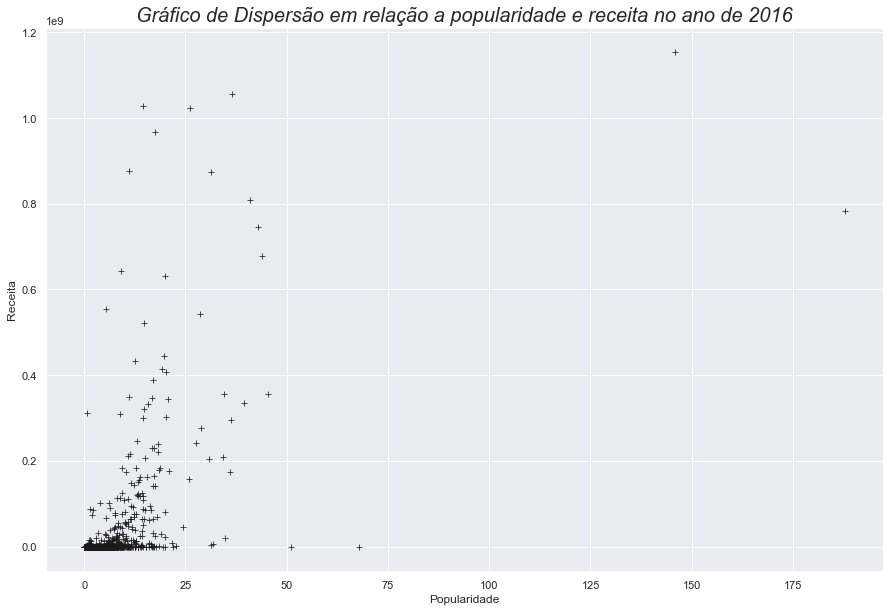

In [176]:
# Observando a correlação da popularidade com a receita 
sns.scatterplot(x = movie_2016['popularity'],y = movie_2016['revenue'], data = movie_2016 ,color='k',marker="+")
plt.xlabel("Popularidade")
plt.ylabel("Receita")
plt.title("Gráfico de Dispersão em relação a popularidade e receita no ano de 2016",loc='center',fontsize=20,fontstyle='italic')
plt.show()

In [177]:
# Verificando quem são os outliers
movie_2016.loc[movie_2016['popularity'] > 125]

,title,status,adult,genres,len_genres,belongs_to_collection,production_countries,production_companies,original_language,spoken_languages,release_date,year,month,budget,revenue,popularity,runtime,vote_average,vote_count,id
26564,Deadpool,Released,False,"[Action, Adventure, Comedy]",3,"{'id': 448150, 'name': 'Deadpool Collection', ...",[United States of America],"[Twentieth Century Fox Film Corporation, Marve...",en,[English],2016-02-09,2016,02,58000000.00,783112979.00,187.86,108.00,7.40,11444.00,293660
26567,Captain America: Civil War,Released,False,"[Adventure, Action, Science Fiction]",3,"{'id': 131295, 'name': 'Captain America Collec...",[United States of America],"[Studio Babelsberg, Marvel Studios, Walt Disne...",en,"[Română, English, Deutsch, Pусский]",2016-04-27,2016,04,250000000.00,1153304495.00,145.88,147.00,7.10,7462.00,271110


## Filmes

1- Top 10 filmes com maior receita e sua relação com a popularidade em 2016

In [178]:
# Agrupando os dados dos filmes por receita e popularidade
top10_movies_2016 = movie_2016.groupby('title')['popularity','revenue'].sum().sort_values(by=['revenue'],ascending=False).head(10)
top10_movies_2016.reset_index(inplace=True)
top10_movies_2016

,title,popularity,revenue
0,Captain America: Civil War,145.88,1153304495.00
1,Rogue One: A Star Wars Story,36.57,1056057273.00
2,Finding Dory,14.48,1028570889.00
3,Zootopia,26.02,1023784195.00
4,The Jungle Book,17.43,966550600.00
5,The Secret Life of Pets,11.01,875457937.00
6,Batman v Superman: Dawn of Justice,31.44,873260194.00
7,Fantastic Beasts and Where to Find Them,41.05,809342332.00
8,Deadpool,187.86,783112979.00
9,Suicide Squad,42.97,745600054.00


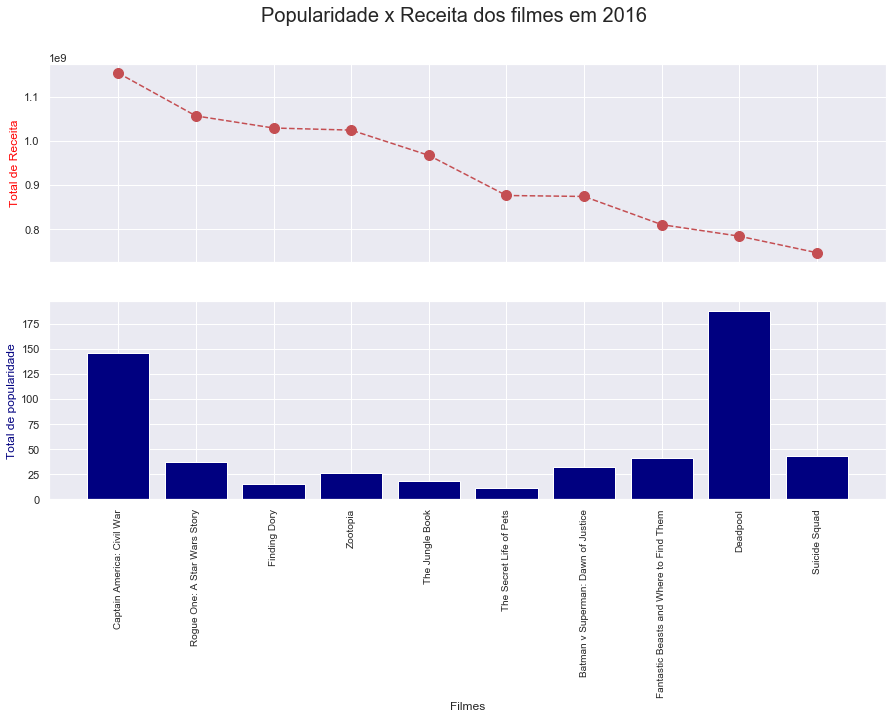

In [179]:
# Gráfico dos filmes 
fig, ax1 = plt.subplots(2,figsize=(15,8),sharex=True)

filmes = [film for film in top10_movies_2016['title'].values]

ax1[0].plot(filmes,top10_movies_2016['revenue'],'r--',marker='o',markersize=10)
fig.suptitle('Popularidade x Receita dos filmes em 2016',fontsize=20)
ax1[1].bar(filmes,top10_movies_2016['popularity'],color='navy')
ax1[1].set_xticklabels(filmes,rotation='vertical',size=10)
ax1[1].set_xlabel('Filmes')
ax1[1].set_ylabel('Total de popularidade', color='navy')
ax1[0].set_ylabel('Total de Receita', color='red')

plt.show()

2 - Quais são os TOP 10 filmes que obtiveram os maiores custos ? E, quais são suas relações de lucro ?

In [180]:
# Retirando as duplicatas
Top10_custos = movie.drop_duplicates(subset=['title'],keep="last")
# Realizando o agrupamento
Top10_custos = Top10_custos.groupby('title')['budget','revenue'].sum().sort_values(by=['budget'],ascending=False).head(10)
Top10_custos.reset_index(inplace=True)

In [181]:
Top10_custos['Lucro'] = Top10_custos['revenue'] - Top10_custos['budget']

In [182]:
Top10_custos

,title,budget,revenue,Lucro
0,Pirates of the Caribbean: On Stranger Tides,380000000.00,1045713802.00,665713802.00
1,Pirates of the Caribbean: At World's End,300000000.00,961000000.00,661000000.00
2,Avengers: Age of Ultron,280000000.00,1405403694.00,1125403694.00
3,Superman Returns,270000000.00,391081192.00,121081192.00
4,Transformers: The Last Knight,260000000.00,604942143.00,344942143.00
5,John Carter,260000000.00,284139100.00,24139100.00
6,Spider-Man 3,258000000.00,890871626.00,632871626.00
7,The Hobbit: The Desolation of Smaug,250000000.00,958400000.00,708400000.00
8,Captain America: Civil War,250000000.00,1153304495.00,903304495.00
9,Harry Potter and the Half-Blood Prince,250000000.00,933959197.00,683959197.00


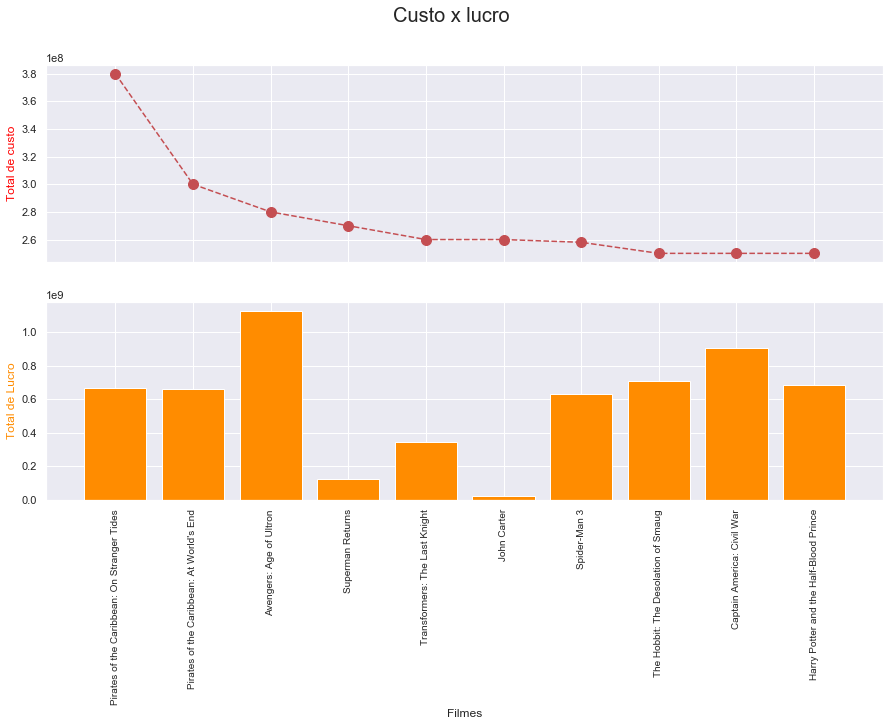

In [183]:
fig, ax1 = plt.subplots(2,figsize=(15,8),sharex=True)

filmes = [film for film in Top10_custos['title'].values]


ax1[0].plot(filmes,Top10_custos['budget'],'r--',marker='o',markersize=10)
fig.suptitle('Custo x lucro',fontsize=20)
ax1[1].bar(filmes,Top10_custos['Lucro'],color='darkorange')
ax1[1].set_xticklabels(filmes,rotation='vertical',size=10)
ax1[1].set_xlabel('Filmes')
ax1[1].set_ylabel('Total de Lucro', color='darkorange')
ax1[0].set_ylabel('Total de custo', color='red')
plt.show()

plt.show()

3 -  Distribuição dos filmes realizados ao longo dos meses

In [184]:
feito = movie.loc[movie['status'] == 'Released']
mes_real = pd.DataFrame(feito.groupby('month')['status'].count()).reset_index()
mes_real.head()

,month,status
0,01,5823
1,02,2998
2,03,3523
3,04,3420
4,05,3321


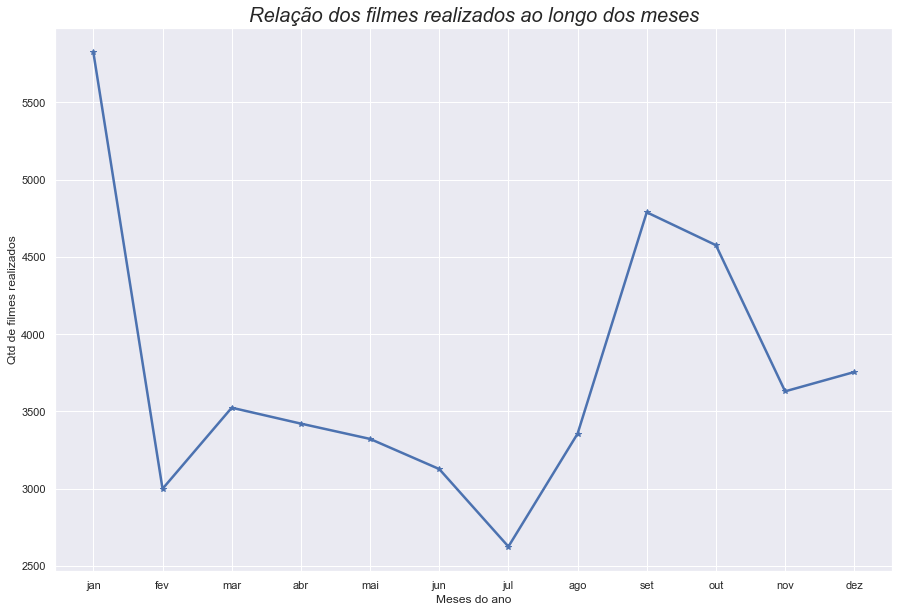

In [185]:
plt.plot(mes_real['month'],mes_real['status'],'b-*',linewidth=2.5)
plt.xticks(range(0,12),["jan","fev","mar","abr","mai","jun","jul","ago","set","out","nov","dez"])
plt.xlabel('Meses do ano')
plt.ylabel('Qtd de filmes realizados')
plt.title("Relação dos filmes realizados ao longo dos meses",fontsize=20,style='italic')
plt.grid(True)
plt.show()

## Produtoras

1- Top 10 das produtoras com os maiores valores de receita

In [186]:
# Extraindo os valores das colunas as quais transformei em listas
comp = movie.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
comp.name = 'companies'

In [187]:
# Acrescentando as colunas novamente em um formato de str normal
Top10_prod = movie.drop('production_companies', axis=1).join(comp)

In [188]:
# Selecionando o top 10
Top10_prod = pd.DataFrame(Top10_prod.groupby('companies')['revenue'].sum().sort_values(ascending=False).head(10)).reset_index()

In [189]:
Top10_prod

,companies,revenue
0,Warner Bros.,62632168470.00
1,Universal Pictures,55259190410.00
2,Paramount Pictures,48808192922.00
3,Twentieth Century Fox Film Corporation,47687746332.00
4,Walt Disney Pictures,40837270159.00
5,Columbia Pictures,32279735705.00
6,New Line Cinema,22173391499.00
7,Amblin Entertainment,17343720181.00
8,DreamWorks SKG,15475754744.00
9,Dune Entertainment,15003789066.00


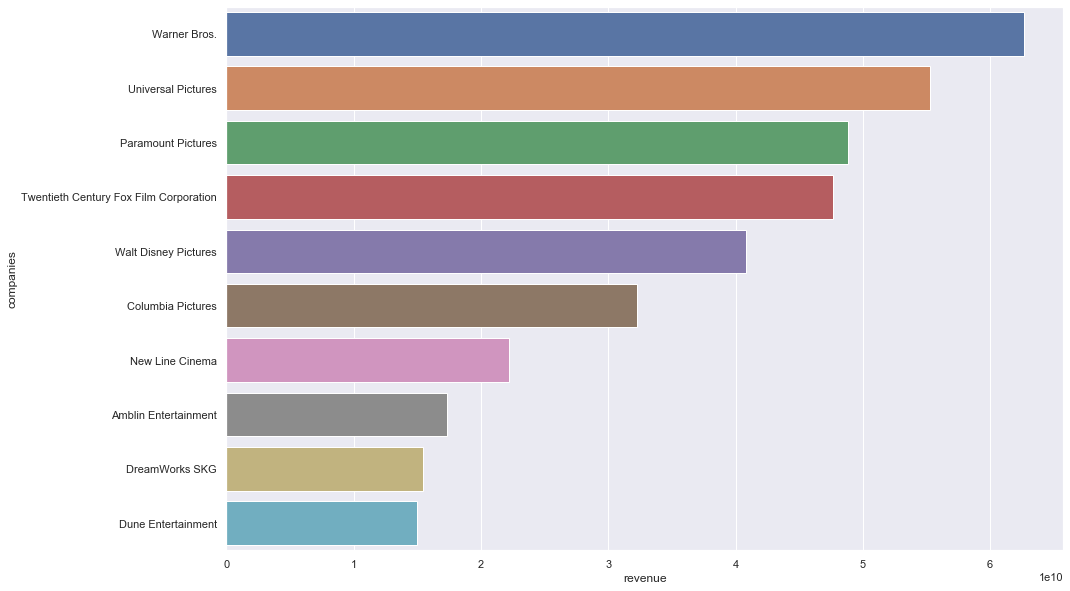

In [190]:
sns.barplot(y=Top10_prod['companies'], x=Top10_prod['revenue'],orient='h')
plt.show()

## Franquias

1 -  TOP 10 das franquias de filmes que obtém as maiores receitas 

In [191]:
# Selecionando os filmes aos quais obtém a coleção preenchida
movie_collection = movie.loc[movie['belongs_to_collection'].notnull()]
movie_collection['belongs_to_collection'] = movie_collection['belongs_to_collection'].apply(lambda x: literal_eval(x)).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
movie_collection = movie_collection[movie_collection['belongs_to_collection'].notnull()]                                           

C:\Users\Eduarda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [192]:
movie_collection.head()

,title,status,adult,genres,len_genres,belongs_to_collection,production_countries,production_companies,original_language,spoken_languages,release_date,year,month,budget,revenue,popularity,runtime,vote_average,vote_count,id
0,Toy Story,Released,False,"[Animation, Comedy, Family]",3,Toy Story Collection,[United States of America],[Pixar Animation Studios],en,[English],1995-10-30,1995,10,30000000.00,373554033.00,21.95,81.00,7.70,5415.00,862
2,Grumpier Old Men,Released,False,"[Romance, Comedy]",2,Grumpy Old Men Collection,[United States of America],"[Warner Bros., Lancaster Gate]",en,[English],1995-12-22,1995,12,0.00,0.00,11.71,101.00,6.50,92.00,15602
4,Father of the Bride Part II,Released,False,[Comedy],1,Father of the Bride Collection,[United States of America],"[Sandollar Productions, Touchstone Pictures]",en,[English],1995-02-10,1995,02,0.00,76578911.00,8.39,106.00,5.70,173.00,11862
9,GoldenEye,Released,False,"[Adventure, Action, Thriller]",3,James Bond Collection,"[United Kingdom, United States of America]","[United Artists, Eon Productions]",en,"[English, Pусский, Español]",1995-11-16,1995,11,58000000.00,352194034.00,14.69,130.00,6.60,1194.00,710
12,Balto,Released,False,"[Family, Animation, Adventure]",3,Balto Collection,[United States of America],"[Universal Pictures, Amblin Entertainment, Amb...",en,[English],1995-12-22,1995,12,0.00,11348324.00,12.14,78.00,7.10,423.00,21032


In [193]:
# Selecionando o top 10
movie_col_receita = pd.DataFrame(movie_collection.groupby('belongs_to_collection')['revenue'].sum().sort_values(ascending=False).head(10)).reset_index()

In [194]:
movie_col_receita

,belongs_to_collection,revenue
0,Harry Potter Collection,7707367425.00
1,Star Wars Collection,7434494790.00
2,James Bond Collection,7106970239.00
3,The Fast and the Furious Collection,5125098793.00
4,Pirates of the Caribbean Collection,4521576826.00
5,Transformers Collection,4366101244.00
6,Despicable Me Collection,3691070216.00
7,The Twilight Collection,3342107290.00
8,Ice Age Collection,3216708553.00
9,Jurassic Park Collection,3031484143.00


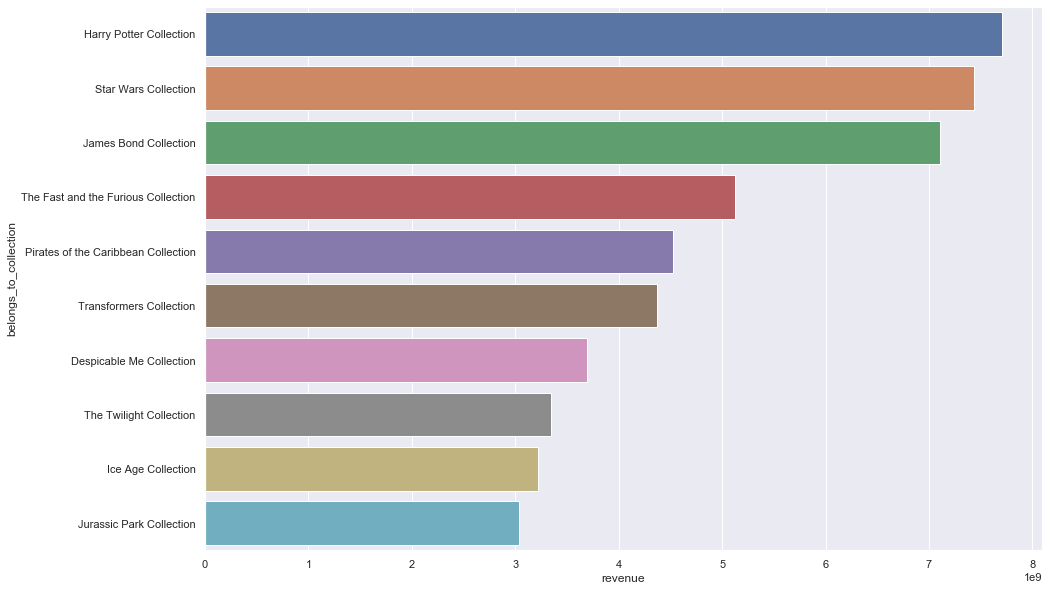

In [195]:
# Plotando o gráfico de barras
sns.barplot(y= movie_col_receita['belongs_to_collection'], x = movie_col_receita['revenue'],orient='h')
#plt.xticks(rotation='vertical')
plt.show()

2- TOP 10 das franquias de filmes que obtém as maiores popularidades

In [196]:
# Selecionando o top 10
movie_col_popularidade = pd.DataFrame(movie_collection.groupby('belongs_to_collection')['popularity'].sum().sort_values(ascending=False).head(10)).reset_index()

In [197]:
movie_col_popularidade = movie_col_popularidade.sort_values(by=['popularity'],ascending=True)

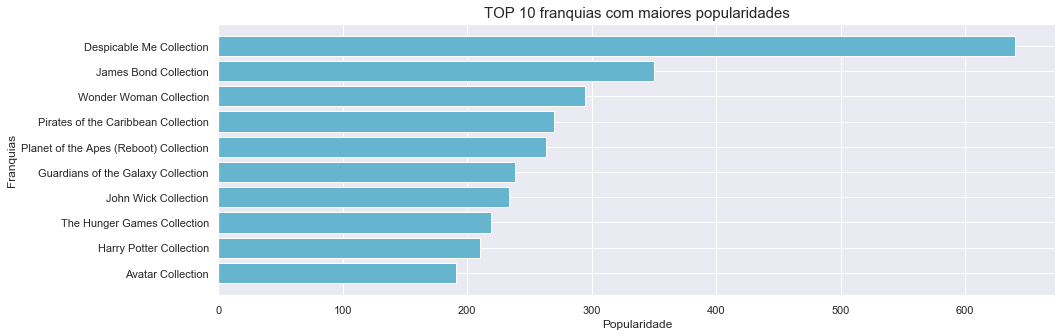

In [198]:
plt.barh(movie_col_popularidade['belongs_to_collection'],movie_col_popularidade['popularity'],color='c')
plt.xlabel('Popularidade')
plt.ylabel('Franquias')
plt.title('TOP 10 franquias com maiores popularidades',size=15,loc='center')
plt.grid(True)
plt.show()

## Runtime

1 - Medidas estatísticas relacionadas ao tempo de execução dos filmes de acordo com sua variável linguística

In [199]:
movie_duracao = movie[['original_language','runtime']].copy()

In [200]:
movie_time = pd.pivot_table(movie_duracao,index='original_language',values='runtime',aggfunc=('sum','median','mean','std','count')).reset_index()

In [201]:
movie_time.head()

,original_language,count,mean,median,std,sum
0,ab,10,84.80,86.50,33.70,848.00
1,af,2,103.00,103.00,12.73,206.00
2,am,2,145.00,145.00,7.07,290.00
3,ar,39,104.36,100.00,54.37,4070.00
4,ay,1,75.00,75.00,nan,75.00


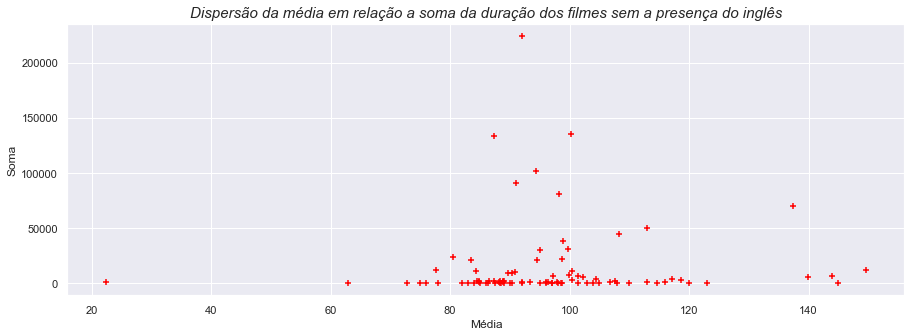

In [202]:
# Visualizando a dispersão da média em relação a soma da variável lingística sem a preença do inglês

# selecionando o df 
movie_time2 = movie_time.loc[movie_time['original_language'] != "en"]

# plotando o gráfico
plt.figure(figsize=(15,5))
plt.scatter(movie_time2['mean'],movie_time2['sum'],color='red',marker="+")
plt.xlabel("Média")
plt.ylabel("Soma")
plt.title("Dispersão da média em relação a soma da duração dos filmes sem a presença do inglês",loc='center',fontsize=15,fontstyle='italic')
plt.show()

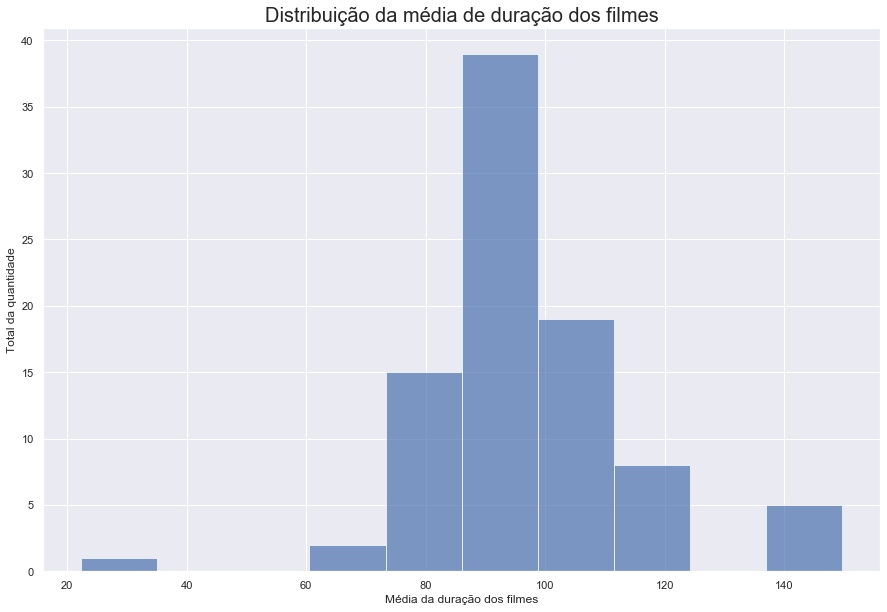

In [203]:
# Plotando o gráfico da distribuição da média
lan = [lang for lang in movie_time['original_language'].values]
plt.hist(movie_time['mean'],color='b',alpha=0.7)
plt.xlabel('Média da duração dos filmes')
plt.ylabel('Total da quantidade')
plt.title("Distribuição da média de duração dos filmes",fontsize=20)
plt.grid(True)
plt.show()

2 - TOP 15 dos filmes com maior quantidade de duração em relação a variável linguística

In [204]:
# Selecionando o dataset
Top15_duracao = movie_time.sort_values(by=['sum'],ascending=False).head(15)

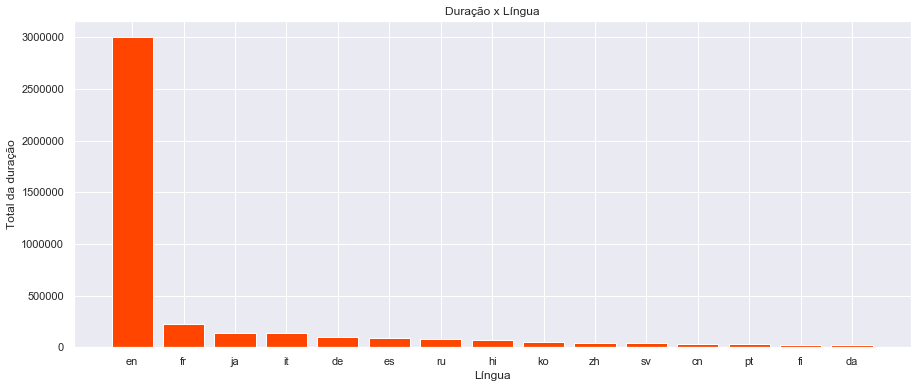

In [205]:
# gráfico
plt.bar(Top15_duracao['original_language'],Top15_duracao['sum'],color='orangered')
plt.xlabel('Língua')
plt.ylabel('Total da duração')
plt.title('Duração x Língua')
plt.show()

## Gênero

1 - Top 10 dos gêneros de filmes com maior quantidade de votos 

In [206]:
# Criando a série
gen = movie.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
gen.name = 'genres'

In [207]:
# Adicionando a coluna do gênero no dataframe
movie_gen = movie.drop('genres',axis=1).join(gen)

In [208]:
# Selecionando o top 10
movie_gen_vote = pd.DataFrame(movie_gen.groupby('genres')['vote_count'].count().sort_values(ascending=False).head(10)).reset_index()

In [209]:
movie_gen_vote

,genres,vote_count
0,Drama,20260
1,Comedy,13179
2,Thriller,7564
3,Romance,6704
4,Action,6592
5,Horror,4668
6,Crime,4305
7,Documentary,3932
8,Adventure,3494
9,Science Fiction,3023


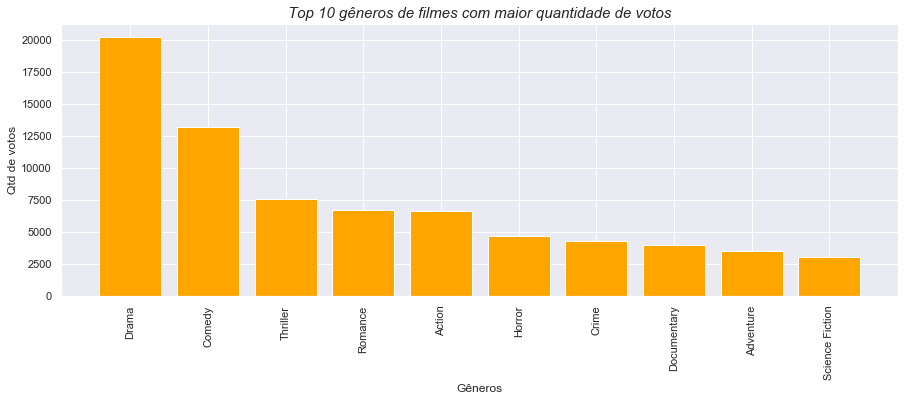

In [210]:
plt.figure(figsize=(15,5))
plt.bar(movie_gen_vote['genres'],movie_gen_vote['vote_count'],color='orange')
plt.xticks(rotation=90)
plt.xlabel("Gêneros")
plt.ylabel("Qtd de votos")
plt.title("Top 10 gêneros de filmes com maior quantidade de votos",fontsize=15,loc='center',fontstyle='italic')
plt.show()

## Receita

1- Distribuição da receita ao longo dos meses

In [211]:
receita_mes = pd.DataFrame(movie.groupby('month')['revenue'].mean().sort_values(ascending=False)).reset_index()
receita_mes.head()

,month,revenue
0,06,22879317.20
1,07,20024827.95
2,12,17690191.88
3,05,17263951.82
4,11,14169637.90


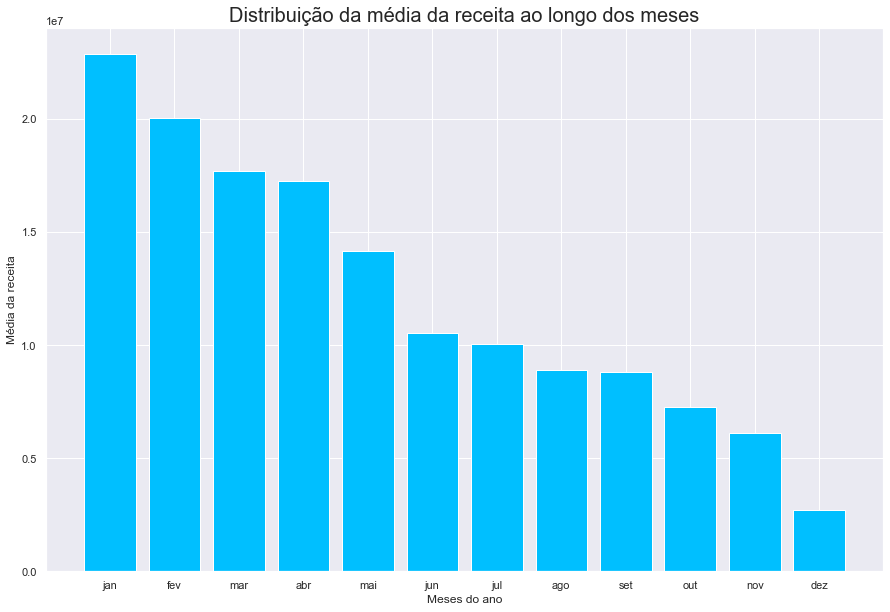

In [221]:
plt.bar(receita_mes['month'],receita_mes['revenue'],color='deepskyblue')
plt.xticks(range(0,12),["jan","fev","mar","abr","mai","jun","jul","ago","set","out","nov","dez"])
plt.title("Distribuição da média da receita ao longo dos meses",size=20)
plt.xlabel("Meses do ano")
plt.ylabel("Média da receita")
plt.show()

2 - Média da receita e dos votos em relação ao status

In [213]:
movie_cla = movie[['status','revenue','vote_average']].copy()
movie_cla.dropna(subset=['status','vote_average'],inplace=True)

In [214]:
movie_per = pd.pivot_table(movie_cla,index='status',values=['revenue','vote_average'],aggfunc=('mean')).reset_index()
movie_per

,status,revenue,vote_average
0,Canceled,0.00,5.10
1,In Production,0.00,4.67
2,Planned,0.00,5.67
3,Post Production,365279.56,5.14
4,Released,11318903.79,5.62
5,Rumored,138935.68,5.39


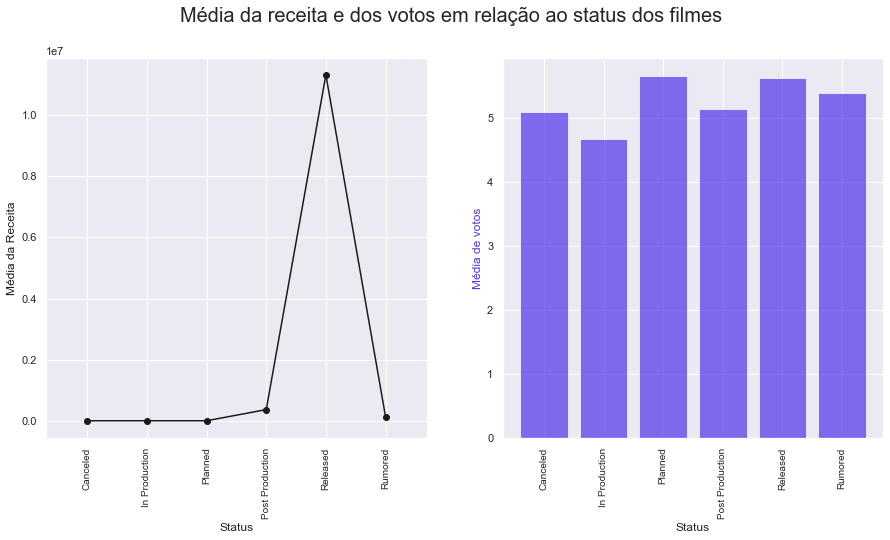

In [219]:
# Gráfico da relação da soma de receita e média de acordo com seus status
fig, ax1 = plt.subplots(1,2,figsize=(15,7),sharex=True)

label = [status for status in movie_per['status'].values ]

ax1[0].plot(label,movie_per['revenue'],'k-o')
ax1[0].set_ylabel('Média da Receita', color='k')
ax1[0].set_xticklabels(label,rotation='vertical',size=10)
ax1[0].set_xlabel('Status')
ax1[1].bar(label,movie_per['vote_average'],color='#5133EC',alpha=0.7)
ax1[1].set_xticklabels(label,rotation='vertical',size=10)
fig.suptitle("Média da receita e dos votos em relação ao status dos filmes",fontsize=20)
ax1[1].set_xlabel('Status')
ax1[1].set_ylabel('Média de votos', color='#5133EC')

plt.show()

## Correlações

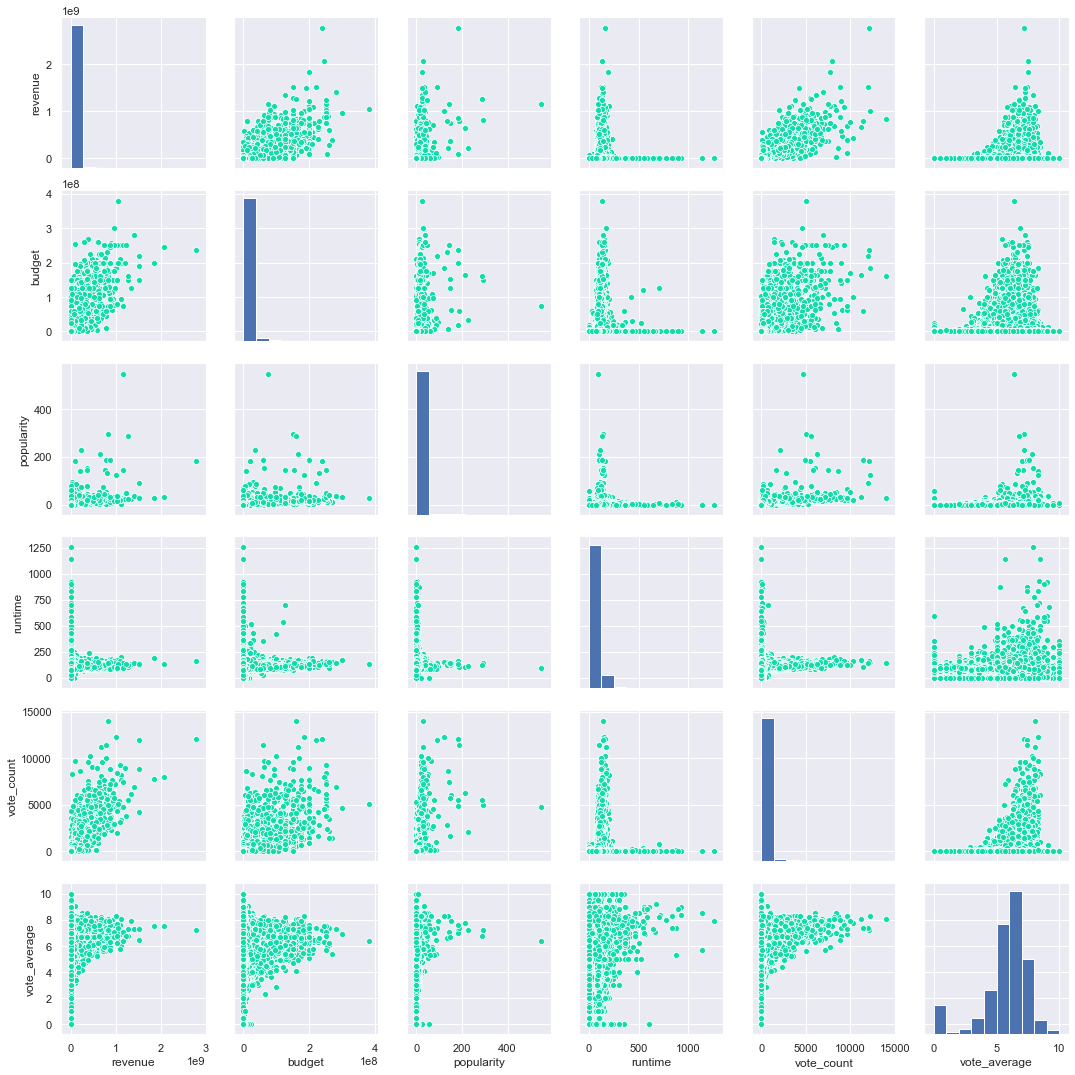

In [222]:
# Pairplot
sns.pairplot(movie[['revenue','budget','popularity','runtime','vote_count','vote_average']] , plot_kws={'color':'#0EDCA9'})